## Observations and Insights 

In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Homework5_Mouse_metadata.csv"
study_results_path = "Homework5_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [162]:
# Checking the number of mice in the DataFrame.
mouse_df["Mouse ID"].nunique()

249

In [163]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
count_time_point = mouse_df.groupby("Timepoint")
count_time_point_df = pd.DataFrame(count_time_point["Mouse ID"].value_counts())
count_time_point_df

Mouse ID
Timepoint Mouse ID          
0         g989             2
          a203             1
          a251             1
          a262             1
          a275             1
...                      ...
45        y865             1
          z578             1
          z581             1
          z795             1
          z969             1

[1888 rows x 1 columns]

In [164]:
# Optional: Get all the data for the duplicate mouse ID
duplicate = mouse_df[mouse_df.duplicated()]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [165]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_dup_mice = mouse_df.drop_duplicates(keep=False, inplace=True)
remove_dup_mice

In [166]:
# Checking the number of mice in the clean DataFrame.
count_time_point = mouse_df.groupby("Timepoint")
count_time_point_df = pd.DataFrame(count_time_point["Mouse ID"].value_counts())
count_time_point_df

Mouse ID
Timepoint Mouse ID          
0         a203             1
          a251             1
          a262             1
          a275             1
          a366             1
...                      ...
45        y865             1
          z578             1
          z581             1
          z795             1
          z969             1

[1887 rows x 1 columns]

## Summary Statistics

In [167]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

summary_group = mouse_df.groupby("Drug Regimen")
summary_mean = summary_group["Tumor Volume (mm3)"].mean()
summary_median = summary_group["Tumor Volume (mm3)"].median()
summary_std = summary_group["Tumor Volume (mm3)"].std()
summary_var = summary_group["Tumor Volume (mm3)"].var()
summary_mean_st = pd.DataFrame(summary_mean)
summary_mean_st.columns = ["Mean Tumor Volume"]
summary_median_st = pd.DataFrame(summary_median)
summary_median_st.columns = ["Median Tumor Volume"]
summary_std_st = pd.DataFrame(summary_std)
summary_std_st.columns = ["Tumor Volume Std. Dev"]
summary_var_st = pd.DataFrame(summary_var)
summary_var_st.columns = ["Tumor Volume Variance"]

summary_statistics = summary_mean_st.copy() 
summary_statistics["Median Tumor Volume"] = summary_median_st["Median Tumor Volume"]
summary_statistics["Tumor Volume Std. Dev"] = summary_std_st["Tumor Volume Std. Dev"]
summary_statistics["Tumor Volume Variance"] = summary_var_st["Tumor Volume Variance"]                                              
summary_statistics = summary_statistics.reset_index()
summary_statistics



,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std. Dev,Tumor Volume Variance
0,Capomulin,40.675741,41.557809,4.994774,24.947764
1,Ceftamin,52.591172,51.776157,6.268188,39.290177
2,Infubinol,52.884795,51.820584,6.567243,43.128684
3,Ketapril,55.235638,53.698743,8.279709,68.553577
4,Naftisol,54.331565,52.509285,8.134708,66.173479
5,Placebo,54.033581,52.288934,7.821003,61.168083
6,Propriva,52.414660,50.965298,6.496144,42.199890
7,Ramicane,40.216745,40.673236,4.846308,23.486704
8,Stelasyn,54.233149,52.431737,7.710419,59.450562
9,Zoniferol,53.236507,51.818479,6.966589,48.533355


In [168]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.


## Bar Plots

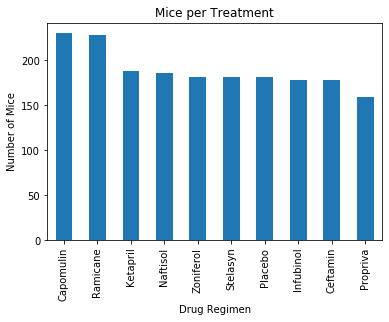

In [169]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
time_ref = mouse_df.groupby('Drug Regimen')
time_ref_count = time_ref['Mouse ID'].count()
order = time_ref_count.sort_values(ascending = False)
mice_chart = order.plot(kind="bar", title="Mice per Treatment")
mice_chart.set_xlabel("Drug Regimen")
mice_chart.set_ylabel("Number of Mice")
plt.show()


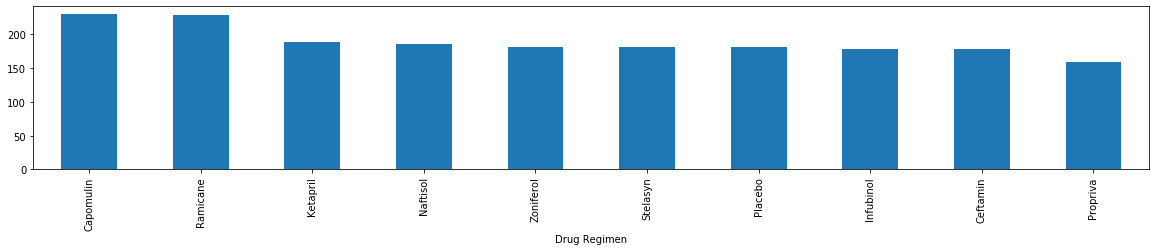

<Figure size 432x288 with 0 Axes>

In [170]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
time_ref = mouse_df.groupby('Drug Regimen')
count_mice = time_ref['Mouse ID'].count()
order = count_mice.sort_values(ascending = False)
order.plot(kind='bar', figsize = (20,3))
    
#order.set_xlabel("Treatment")
#order.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()


(-1.1056031302324567,
 1.102935641318436,
 -1.1048958498515298,
 1.100233161810833)

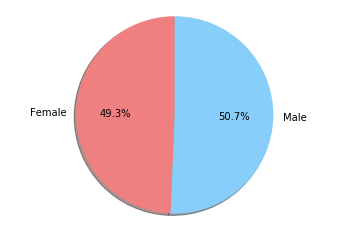

In [171]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
lb_treat = mouse_df.groupby('Sex')
count_mouse = lb_treat['Mouse ID'].count()
treatment = count_mouse.reset_index()["Sex"].to_list()
colors = ["lightcoral","lightskyblue"]
plt.pie(count_mouse, labels=treatment, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")


(-1.2105804901246933,
 1.1079345632180662,
 -1.1049996746207027,
 1.1024134819634648)

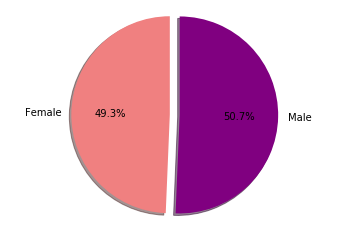

In [172]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

lb_treat = mouse_df.groupby('Sex')
count_mouse = lb_treat['Mouse ID'].count()
treatment = count_mouse.reset_index()["Sex"].to_list()
colors = ["lightcoral","purple"]
explode = (0.1,0)
plt.pie(count_mouse,explode = explode, labels=treatment, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [173]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

group_mice = mouse_df.groupby("Mouse ID").max()
group_mice = group_mice.reset_index()
merge= pd.merge(group_mice[["Mouse ID", "Timepoint"]], mouse_df, on=["Mouse ID", "Timepoint"],how="left")
capomulin_df = merge.loc[merge["Drug Regimen"] == "Capomulin", :]
tumor_volume = capomulin_df["Tumor Volume (mm3)"]
quartiles = tumor_volume.quantile([.25,.5,.75])
lowerq= quartiles[0.25]
upperq= quartiles[0.75]
IQR = upperq -  lowerq
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"The interquartile range of final tumor volume is: {IQR}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The interquartile range of final tumor volume is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [174]:
# Quantitatively determine ramicane outliers
group_mice = mouse_df.groupby("Mouse ID").max()
group_mice = group_mice.reset_index()
merge_ramicane= pd.merge(group_mice[["Mouse ID", "Timepoint"]], mouse_df, on=["Mouse ID", "Timepoint"],how="left")
ramicane_df = merge_ramicane.loc[merge["Drug Regimen"] == "Ramicane", :]
tumor_volume_ramicane = ramicane_df["Tumor Volume (mm3)"]
quartiles = tumor_volume_ramicane.quantile([.25,.5,.75])
lowerq= quartiles[0.25]
upperq= quartiles[0.75]
IQR = upperq -  lowerq
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"The interquartile range of final tumor volume is: {IQR}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The interquartile range of final tumor volume is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [175]:
# Quantitatively determine infubinol outliers
group_mice = mouse_df.groupby("Mouse ID").max()
group_mice = group_mice.reset_index()
merge_infubinol= pd.merge(group_mice[["Mouse ID", "Timepoint"]], mouse_df, on=["Mouse ID", "Timepoint"],how="left")
infubinol_df = merge_infubinol.loc[merge["Drug Regimen"] == "Infubinol", :]
tumor_volume_infubinol = infubinol_df["Tumor Volume (mm3)"]
quartiles = tumor_volume_infubinol.quantile([.25,.5,.75])
lowerq= quartiles[0.25]
upperq= quartiles[0.75]
IQR = upperq -  lowerq
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"The interquartile range of final tumor volume is: {IQR}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The interquartile range of final tumor volume is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [176]:
# Quantitatively determine ceftamin outliers
group_mice = mouse_df.groupby("Mouse ID").max()
group_mice = group_mice.reset_index()
merge_ceftmain= pd.merge(group_mice[["Mouse ID", "Timepoint"]], mouse_df, on=["Mouse ID", "Timepoint"],how="left")
ceftmain_df = merge_ceftmain.loc[merge["Drug Regimen"] == "Ceftamin", :]
tumor_volume_ceftmain = ceftmain_df["Tumor Volume (mm3)"]
quartiles = tumor_volume_ceftmain.quantile([.25,.5,.75])
lowerq= quartiles[0.25]
upperq= quartiles[0.75]
IQR = upperq -  lowerq
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)


print(f"The interquartile range of final tumor volume is: {IQR}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The interquartile range of final tumor volume is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


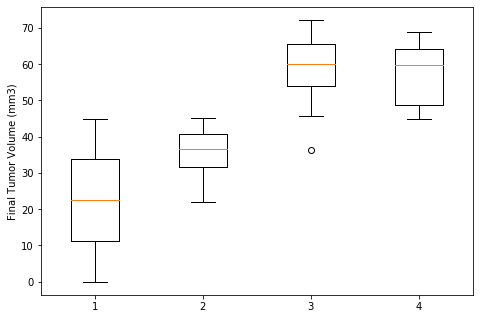

In [198]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig = plt.figure()




data_plot = [tumor_volume, tumor_volume_ramicane, tumor_volume_infubinol, tumor_volume_ceftmain]

ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(data_plot)
ax.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

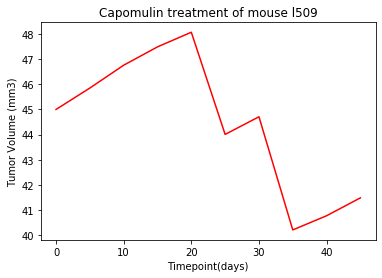

In [178]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#group_capomulin = mouse_df.groupby("Drug Regimen")
group_mouse = mouse_df.loc[(mouse_df["Mouse ID"] == "l509"), :]
time_point = group_mouse["Tumor Volume (mm3)"]
tumor_volume = group_mouse["Timepoint"]
line_plot = plt.plot(tumor_volume, time_point, color = "red")
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin treatment of mouse l509")
plt.show()

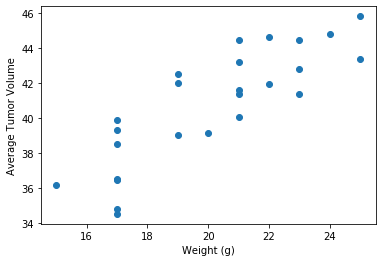

In [179]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin", :]
group_drug =capomulin_df.groupby("Mouse ID")
avg_vol_df = pd.DataFrame(group_drug["Tumor Volume (mm3)"].mean())
weight_df = pd.DataFrame(group_drug["Weight (g)"].mean())
plt.scatter(weight_df,avg_vol_df)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()


## Correlation and Regression

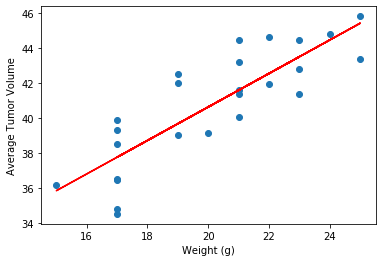

The correlation between mouse weight and the average tumor volume is 0.84


In [180]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = group_drug["Weight (g)"].mean()
y_values = group_drug["Tumor Volume (mm3)"].mean()
(w_slope, w_int, w_r, w_p, w_std_err) = st.linregress(x_values, y_values)
regress_values = weight_df * w_slope + w_int
line_eq = "y = " + str(round(w_slope,2)) + "x + " + str(round(w_int,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")